# Инженерный тур 2022/23 учебный год БД

**Легенда задачи**
- Есть лента «новостей» в некоторой социальной сети, которая наполнена различным контентом.
- Контент состоит из множества записей, которые показываются пользователю.
- Пользователь просматривает каждую запись и как-то взаимодействует ней.
- Для построения системы рекомендации требуется предсказывать тип взаимодействия.

**Условие**

Требуется предсказать, понравится ли пользователям запись в социальной сети?

**Формат входных данных**

Набор данных, подготовленный командой VK, доступен по адресу https://disk.yandex.ru/d/Gffq-VhB5jekKQ.

**Он состоит из нескольких CSV файлов:**
- `topics.csv` — содержит информацию о записях социальной сети «Одноклассники». Каждая запись характеризуется признаками текста и изображения.
- `users.csv` — содержит информацию о пользователях социальной сети «Одноклассники». Каждый пользователь характеризуется датой рождения, полом и
идентификатором города.
- `train.csv` — содержит информацию о взаимодействии пользователей с записями социальной сети «Одноклассники». Тип взаимодействия равен L, если
запись понравилась, и D — если запись не понравилась.
- `test.csv` — содержит идентификаторы записей и пользователей, для которых
требуется предсказать тип взаимодействия.

**Формат выходных данных**

Необходимо загрузить в тестирующую систему текстовый файл с ответами. Он не должен содержать заголовки и никакой другой дополнительной информации. Каждая строка должна содержать одну заглавную латинскую букву D или L. Ответы
должны быть даны в порядке, в котором были  оответствующие запросы из файла `test.csv`.

Вы можете совершить не более 50-ти попыток решения данной задачи.

**Критерии оценивания**

Для оценки будет использоваться F-мера класса L, умноженная на 10000. Результат, который вы будите получать во время соревнования, будет вычислен только на 20% тестовой выборки. В конце соревнования выбранные вами решения будут перетестированы на оставшихся 80%.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/adele1997/202223")
# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adele1997/202223


100%|██████████| 744M/744M [00:10<00:00, 72.7MB/s]


In [ ]:
import pandas as pd

test = pd.read_csv('/content/202223/dataset/dataset/test.csv')
train = pd.read_csv('/content/202223/dataset/dataset/train.csv')
topics = pd.read_csv('/content/202223/dataset/dataset/topics.csv')
users = pd.read_csv('/content/202223/dataset/dataset/users.csv')

In [ ]:
print(test.shape)
print(train.shape)
print(topics.shape)
print(users.shape)

(1578802, 2)
(14193804, 3)
(206332, 613)
(2682257, 4)


In [ ]:
import dask.dataframe as dd

# Загрузка данных
train = dd.read_csv("/content/202223/dataset/dataset/train.csv")
users = dd.read_csv("/content/202223/dataset/dataset/users.csv", dtype={'birthDate': 'float64'})
topics = dd.read_csv("/content/202223/dataset/dataset/topics.csv")

# Объединение данных
all_train = train.merge(users, on="userId", how="left").merge(topics, on="topicId", how="left")

# Сохранение результата в CSV (если требуется)
all_train.to_csv("all_train.csv", single_file=True, index=False)

In [ ]:
import vaex

# Загрузка данных
train = vaex.open("/content/202223/dataset/dataset/train.csv")
users = vaex.open("/content/202223/dataset/dataset/users.csv")
topics = vaex.open("/content/202223/dataset/dataset/topics.csv")

# Объединение данных
all_train = train.join(users, on="userId", how="left")
all_train = all_train.join(topics, on="topicId", how="left")

# Сохранение объединенных данных
all_train.export("all_train.csv")

,topicId,textEmbedding1,textEmbedding2,textEmbedding3,textEmbedding4,textEmbedding5,textEmbedding6,textEmbedding7,textEmbedding8,textEmbedding9,...,imageEmbedding503,imageEmbedding504,imageEmbedding505,imageEmbedding506,imageEmbedding507,imageEmbedding508,imageEmbedding509,imageEmbedding510,imageEmbedding511,imageEmbedding512
0,190991,0.103227,0.115293,0.052507,0.073696,-0.030694,-0.137884,-0.109099,0.030979,0.080614,...,0.168514,0.121696,0.499123,0.477468,0.381690,0.633771,2.714968,1.439207,0.174758,1.044338
1,2718,-0.034986,0.076977,0.018845,0.095175,0.065714,-0.049839,0.019504,0.037893,0.080707,...,0.761914,1.964616,0.007194,1.334118,0.698971,0.670615,0.582319,0.801659,0.140317,0.566227
2,49923,0.082491,0.056365,0.033455,-0.047511,0.056173,-0.012417,-0.113759,0.013940,-0.005448,...,0.235558,1.110550,0.492605,0.305456,1.682355,0.700588,0.642991,1.167968,0.245469,1.288838
3,124548,0.009309,0.059347,-0.032455,0.118812,0.039696,-0.096897,0.002488,0.010365,0.053090,...,0.262020,3.070008,1.394254,0.020039,2.005446,1.282088,1.007585,0.607097,0.231826,0.942247
4,45289,0.023046,0.023784,-0.036027,0.063103,0.022841,-0.047068,-0.057986,0.090312,0.080568,...,0.845254,0.154326,0.602474,0.152335,3.177809,0.898501,1.745675,1.241217,0.324443,0.600283


In [ ]:
# users.csv — содержит информацию о пользователях социальной сети «Одноклассники».
# Каждый пользователь характеризуется датой рождения, полом и
# идентификатором города.

users.head()

,userId,birthDate,gender,locationId
0,2019458,3.180276e+11,2,5697551
1,96675,-5.455404e+11,2,12141127
2,1378979,4.686228e+11,1,12141421
3,540187,3.998448e+11,1,4126402
4,1182831,6.987600e+09,2,2955426


In [ ]:
# train.csv — содержит информацию о взаимодействии пользователей
# с записями социальной сети «Одноклассники». Тип взаимодействия равен L, если
# запись понравилась, и D — если запись не понравилась.

train.head()

,topicId,userId,feedback
0,198,1044368,L
1,154,1044368,L
2,6,1044368,D
3,77,1044368,D
4,81411,2604826,L


In [ ]:
# test.csv — содержит идентификаторы записей и пользователей, для которых
# требуется предсказать тип взаимодействия

test.head()

,topicId,userId
0,7904,7056
1,2920,7056
2,32593,7056
3,19330,7056
4,11053,7056


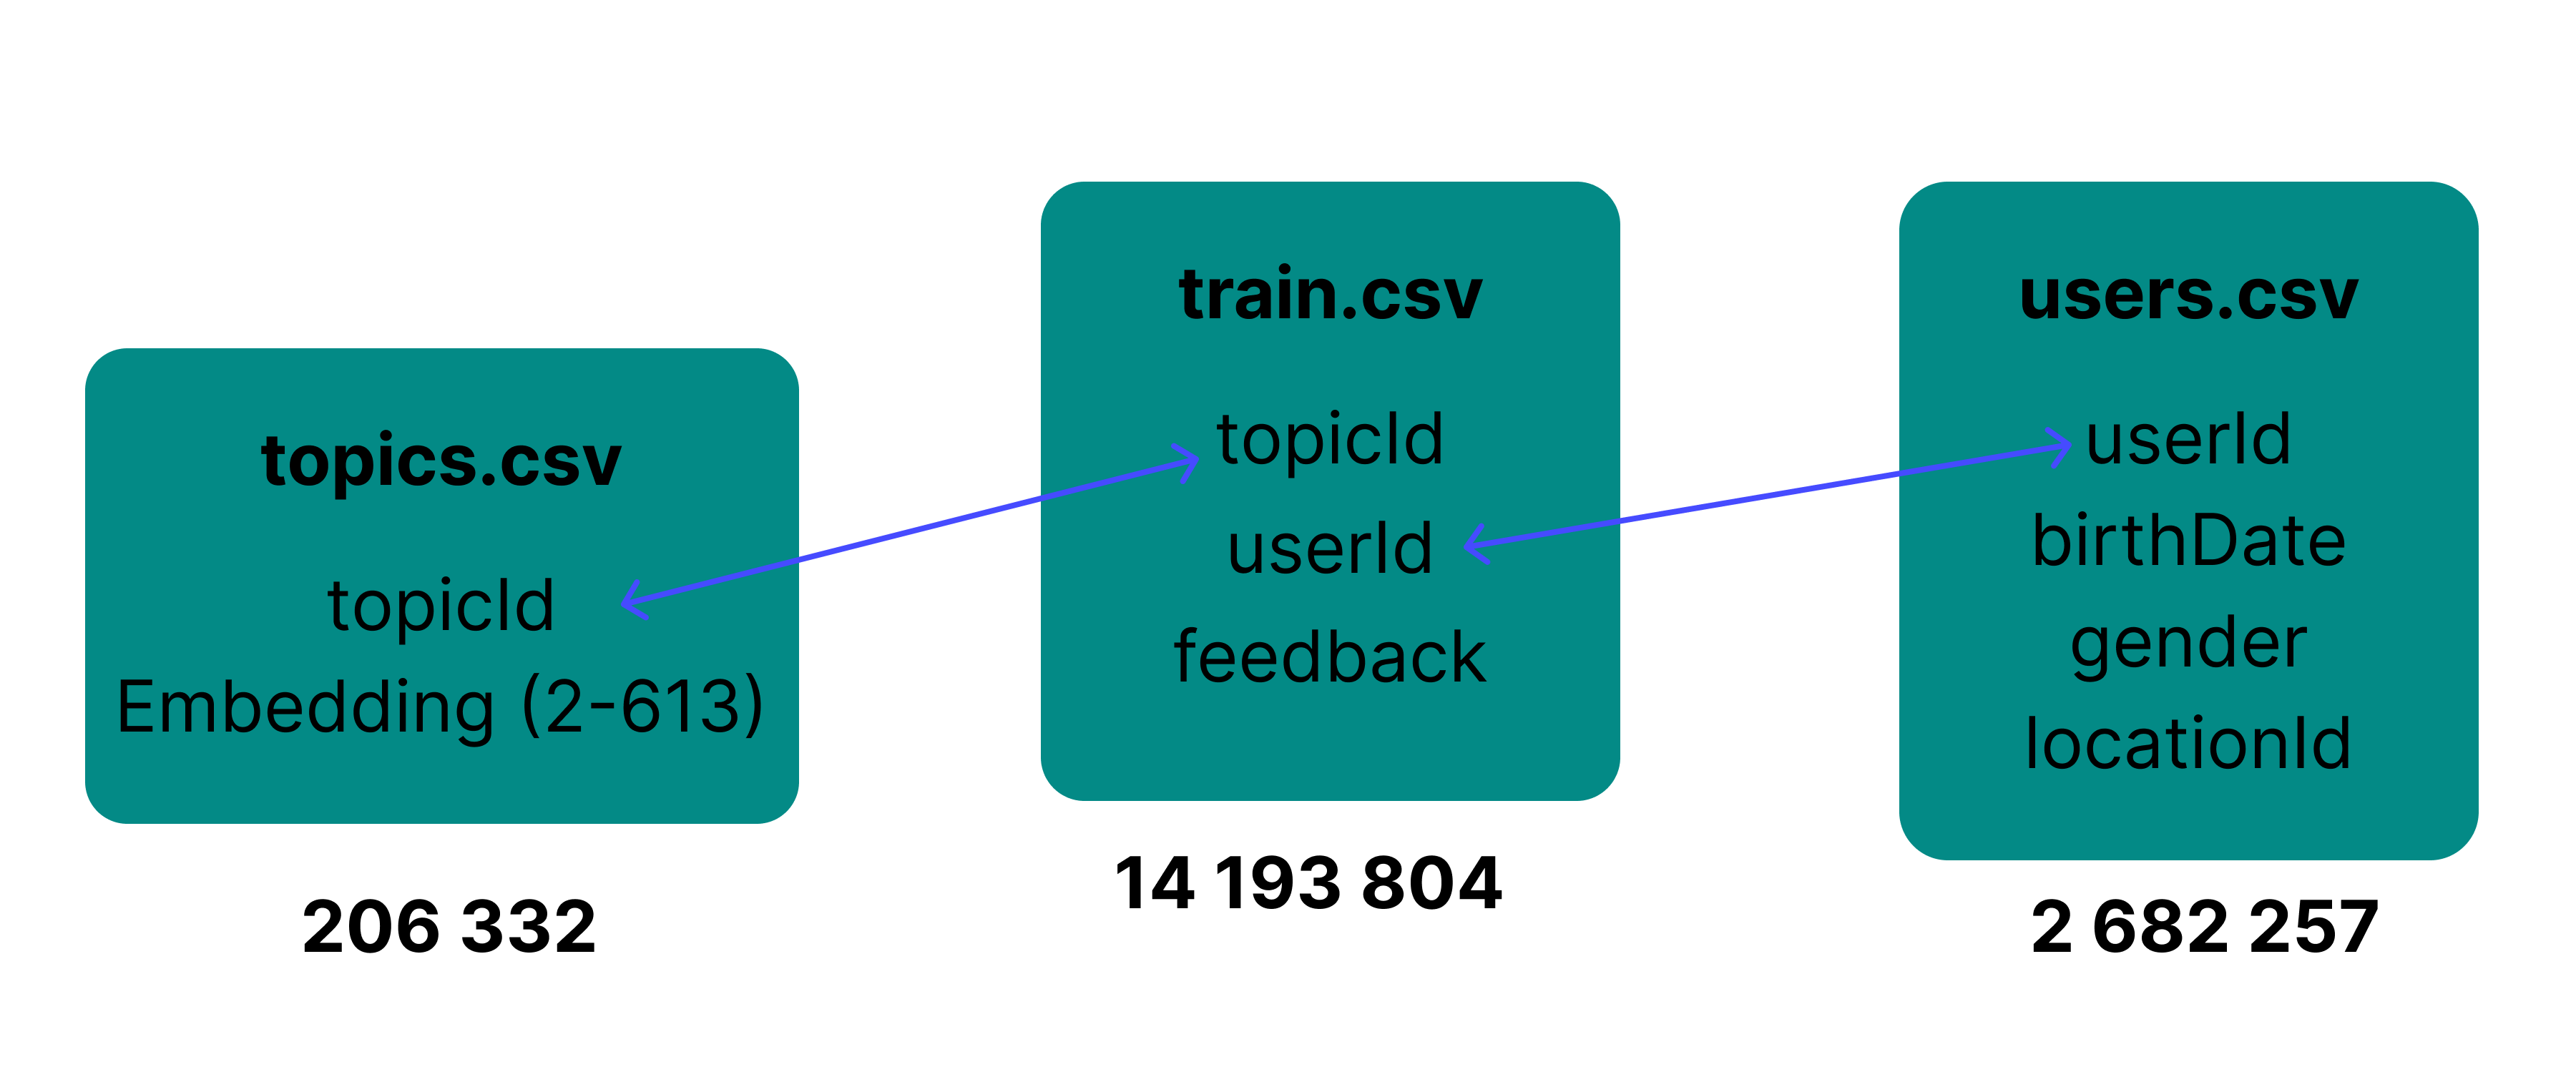

In [ ]:
print(train['topicId'].nunique())
print(train['userId'].nunique())
print(train['feedback'].nunique())

202075
2654885
2


In [ ]:
print(test['topicId'].nunique())
print(test['userId'].nunique())

113559
952051


In [ ]:
# количество одинаковых постов в train и test
# из 113 559, в train есть 109 302
len(set(test['topicId']) & set(train['topicId']))

109302

In [ ]:
113 559 - 109 302

4257

In [ ]:
# количество одинаковых пользователей в train и test
# из 952 051 в train есть 924 679
len(set(test['userId']) & set(train['userId']))

924679

In [ ]:
# количество пар пост-пользователей из теста, которые есть в train
len(set(zip(test['topicId'], test['userId'])) & set(zip(train['topicId'], train['userId'])))

0

## Базовое решение

В качестве базового решения используется подход, в котором для каждой записи вычисляется число отметок типа `L` (нравится) и `D` (не нравится). Если отметок `L` было больше, то для всех запросов из тестового множества будет даваться ответ `L` независимо от пользователя, иначе будет даваться ответ `D`.

In [ ]:
tmp = train.groupby('topicId').agg({'feedback': 'value_counts'})

In [ ]:
tmp.columns = ['value_counts']
tmp = tmp.reset_index()
tmp

,topicId,feedback,value_counts
0,0,D,54674
1,0,L,2111
2,1,D,42507
3,1,L,3442
4,2,D,35830
...,...,...,...
323182,206327,L,1
323183,206328,L,1
323184,206329,D,1
323185,206330,D,1


**Что видим?**

1. Есть посты, у которых только одна реакция (либо нравится, либо не нравится)
2. Есть посты, у которых много реакций

In [ ]:
tmp = tmp[tmp['value_counts'] > 500]

In [ ]:
idx = tmp.groupby('topicId')['value_counts'].idxmax()
idx = idx.reset_index()['value_counts'].values
most_common_feedback = tmp.loc[idx, ['topicId', 'feedback']]

In [ ]:
len(set(tmp.loc[idx, 'topicId'].values) & set(test['topicId']))

109302

In [ ]:
test = test.merge(most_common_feedback, on = 'topicId', how = 'left')

In [ ]:
test.isna().sum()
# 4257
# но после этого осталось 4 489 не заполненных значений
# которых нет в train

,0
topicId,0
userId,0
feedback,714334


In [ ]:
# На случай, если topicId нет в train
test['feedback'] = test['topicId'].map(most_common_feedback).fillna('D')

In [ ]:
# или отдельно возьмем пустые, которые не получилось заполнить из train
# и заполним их как то более осознано, например с помощью след решения
# получится гибридное решение
test[test['feedback'].isna()]

,topicId,userId,feedback
0,7904,7056,NaN
2,32593,7056,NaN
3,19330,7056,NaN
4,11053,7056,NaN
5,4868,7056,NaN
...,...,...,...
1578793,5984,350989,NaN
1578795,5980,468199,NaN
1578796,2760,468199,NaN
1578798,26488,692556,NaN


In [ ]:
test['feedback'].to_csv('submission.csv', index=False, header=False)

## Классическое ML

Можно решить эту задачу как классическую задачу обучения с учителем. Для этого требуется объединить таблицы с описанием пользователей и записей. Но в результате будут получаться объекты из большого числа признаков. Для построения модели можно воспользоваться библиотекой XGBoost.

In [ ]:
import pandas as pd

test = pd.read_csv('/content/202223/dataset/dataset/test.csv')
train = pd.read_csv('/content/202223/dataset/dataset/train.csv')
topics = pd.read_csv('/content/202223/dataset/dataset/topics.csv')
users = pd.read_csv('/content/202223/dataset/dataset/users.csv')

In [ ]:
train.isna().sum()

,0
topicId,0
userId,0
feedback,0


In [ ]:
users.isna().sum()

,0
userId,0
birthDate,22793
gender,0
locationId,0


In [ ]:
print(test.shape)
print(train.shape)
print(topics.shape)
print(users.shape)

(1578802, 2)
(14193804, 3)
(206332, 613)
(2682257, 4)


In [ ]:
# Объединим датафреймы в один
# но для полного объединения тупо не хватает памяти
# поэтому оставим ток train и user объединение
all_train = train.merge(users, on='userId')
# all_train = all_train.merge(topics, on='topicId')
all_train

# Объединение данных
# all_train = train.merge(users, on='userId', how='left').merge(topics, on='topicId', how='left')
# all_test = test.merge(users, on='userId', how='left').merge(topics, on='topicId', how='left')

,topicId,userId,feedback,birthDate,gender,locationId
0,198,1044368,L,-5.031180e+11,2,14882721
1,154,1044368,L,-5.031180e+11,2,14882721
2,6,1044368,D,-5.031180e+11,2,14882721
3,77,1044368,D,-5.031180e+11,2,14882721
4,81411,2604826,L,-1.375596e+11,1,2114999
...,...,...,...,...,...,...
14193799,231,703677,D,3.650256e+11,1,5326297
14193800,277,1095615,L,-4.705452e+11,2,35937079
14193801,68,1095615,D,-4.705452e+11,2,35937079
14193802,14621,1095615,L,-4.705452e+11,2,35937079


In [ ]:
all_train.isna().sum()

,0
topicId,0
userId,0
feedback,0
birthDate,119954
gender,0
locationId,0


In [ ]:
all_train.dtypes

,0
topicId,int64
userId,int64
feedback,object
birthDate,float64
gender,int64
locationId,int64


In [ ]:
all_train['birthDate'].fillna(all_train.birthDate.median(), inplace = True)

<ipython-input-7-3ee32e922647>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_train['birthDate'].fillna(all_train.birthDate.median(), inplace = True)


In [ ]:
all_train.isna().sum()

,0
topicId,0
userId,0
feedback,0
birthDate,0
gender,0
locationId,0


In [ ]:
# Объединим датафреймы в один
# но для полного объединения тупо не хватает памяти
# поэтому оставим ток train и user объединение
all_test = test.merge(users, on='userId')
# all_train = all_train.merge(topics, on='topicId')
all_test

,topicId,userId,birthDate,gender,locationId
0,7904,7056,-2.642220e+11,2,527261
1,2920,7056,-2.642220e+11,2,527261
2,32593,7056,-2.642220e+11,2,527261
3,19330,7056,-2.642220e+11,2,527261
4,11053,7056,-2.642220e+11,2,527261
...,...,...,...,...,...
1578797,443,468755,-1.684908e+11,2,3123844
1578798,26488,692556,1.606932e+11,2,867411
1578799,484,1078639,-6.551820e+11,2,205383
1578800,1832,184614,-5.415660e+11,1,527261


In [ ]:
all_test.isna().sum()

,0
topicId,0
userId,0
birthDate,0
gender,0
locationId,0


In [ ]:
all_test.birthDate.fillna(all_train.birthDate.median(), inplace = True)

<ipython-input-11-f0fd47c10ef7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_test.birthDate.fillna(all_train.birthDate.median(), inplace = True)


In [ ]:
all_train['locationId'] = all_train['locationId'].astype("category")
all_train['gender'] = all_train['gender'].astype("category")
all_train['topicId'] = all_train['topicId'].astype("category")
all_train['userId'] = all_train['userId'].astype("category")

all_test['locationId'] = all_test['locationId'].astype("category")
all_test['gender'] = all_test['gender'].astype("category")
all_test['topicId'] = all_test['topicId'].astype("category")
all_test['userId'] = all_test['userId'].astype("category")

In [ ]:
all_test.head(2)

,topicId,userId,birthDate,gender,locationId
0,7904,7056,-2.642220e+11,2,527261
1,2920,7056,-2.642220e+11,2,527261


In [ ]:
all_train.head(2)

,topicId,userId,feedback,birthDate,gender,locationId
0,198,1044368,L,-5.031180e+11,2,14882721
1,154,1044368,L,-5.031180e+11,2,14882721


In [ ]:
# нормализация
all_train['birthDate'] = (all_train.birthDate - all_train.birthDate.min()) / (all_train.birthDate.max() - all_train.birthDate.min())

all_test['birthDate'] = (all_test.birthDate - all_test.birthDate.min()) / (all_test.birthDate.max() - all_test.birthDate.min())

In [ ]:
all_train.head(2)

,topicId,userId,feedback,birthDate,gender,locationId
0,198,1044368,L,0.459515,2,14882721
1,154,1044368,L,0.459515,2,14882721
2,6,1044368,D,0.459515,2,14882721
3,77,1044368,D,0.459515,2,14882721
4,81411,2604826,L,0.557986,1,2114999


In [ ]:
all_train.drop(['locationId', 'userId', 'topicId'], axis=1, inplace=True)

train['feedback'] = train['feedback'].map({'L': 1, 'D': 0})

y = all_train['feedback']
X = all_train.drop('feedback', axis = 1)

In [ ]:
K = 5

kf = KFold(n_splits = K, random_state = 1, shuffle = True)

model = CatBoostClassifier(
    cat_features = ['gender'],
    depth = 16,
    l2_leaf_reg = 34,
    random_seed = 42,
    learning_rate = 0.00009,
    iterations = 50,
    loss_function = 'Logloss')

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(train)):
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", i)
    if OPTIMIZE_ROUNDS:
        fit_model = model.fit( X_train, y_train,
                              eval_set=[X_valid, y_valid],
                              use_best_model=True)
    else:
        fit_model = model.fit( X_train, y_train)

In [ ]:
test.drop(['Unnamed: 0.1', 'locationId', 'userId', 'topicId'], axis=1,inplace=True)

model.get_feature_importance(prettified=True)
test.drop(['Unnamed: 0.1', 'locationId', 'userId', 'topicId'], axis=1,inplace=True)

# Предсказания для теста
test['feedback'] = fit_model.predict(test, axis=1)
test['feedback'] = test['feedback'].map({1: 'L', 0: 'D'})

# Сохранение результатов
test['feedback'].to_csv('submission.csv', index=False, header=False)

## Решение с помощью рекомендательных систем

Также можно решить эту задачу как классическую задачу коллаборативной фильтрации. Для этого достаточно использовать только таблицу с информацией о взаимодействии пользователей и записей. Можно представить, что эта таблица кодирует разреженную матрицу размера N на M, где N — число пользователей, а M — число записей. Взаимодействие L можно кодировать значением +1, а D — значением −1. В таком виде можно попытаться факторизовать матрицу на две матрицы с небольшим рангом. Например, для этого можно использовать метод NMF из библиотеки surprise.

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357276 sha256=a316625a78f9af8eb74843ae652fb28803f3e7dbea55a98a1faeb78033f148ee
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.7 MB/s eta 0:00:00


Коллаборативная фильтрация (Collaborative Filtering) — это один из основных методов рекомендательных систем, который использует информацию о взаимодействии пользователей с объектами (например, лайки, покупки, просмотры) для построения рекомендаций.

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from implicit.als import AlternatingLeastSquares
import scipy.sparse as sp
import pandas as pd

train = pd.read_csv('/content/202223/dataset/dataset/train.csv')
train['feedback'] = train['feedback'].map({'L': 1, 'D': -1})

train.head()

,topicId,userId,feedback
0,198,1044368,1
1,154,1044368,1
2,6,1044368,-1
3,77,1044368,-1
4,81411,2604826,1


In [ ]:
# Создание матрицы взаимодействий (пользователь × объект)
user_item_matrix = train.pivot_table(index='userId', columns='topicId', values='feedback', fill_value=0)
sparse_matrix = sp.csr_matrix(user_item_matrix)

sparse_matrix

<ipython-input-4-bdfccf2e2581>:2: PerformanceWarning: The following operation may generate 536485886375 cells in the resulting pandas object.
  user_item_matrix = train.pivot_table(index='userId', columns='topicId', values='feedback', fill_value=0)


In [ ]:
# Обучение модели ALS
model = AlternatingLeastSquares(factors=20,
                                regularization=0.1,
                                iterations=50)
model.fit(sparse_matrix.T)  # Матрицу нужно транспонировать (объект × пользователь)


test = pd.read_csv('/content/202223/dataset/dataset/test.csv')

predictions = [
    'L' if model.rank_items(user, sparse_matrix[user], sparse_matrix.T)[0][0] > 0 else 'D'
    for user in test['userId']
]

# Сохранение результатов
pd.Series(predictions).to_csv('submission.csv', index=False, header=False)

# Инженерный тур 2023/24 учебный год БД

**Легенда задачи**

Есть видеосервис в социальной сети Одноклассники. Пользователи видеосервиса взаимодействуют с видеозаписями: просматривают и ставят отметки «нравится».
Была собрана история таких взаимодействий и разбита на две части: прошлое — для
тренировки моделей и будущие — для тестирования. Помимо этого была извлечена
информация о пользователях, видеозаписях и каналах, на которое они загружены.
Необходимо каждому пользователю порекомендовать десять видеозаписей.

**Описание задачи**

Требуется построить систему рекомендации видеозаписей на основе собранной
информации, которая лежит в CSV-файлах.
1. `train.csv` — основная таблица содержит информацию о взаимодействии пользователей с видеозаписями. Состоит из четырех колонок:
    - `interaction_type` — тип взаимодействия: `like` или `view`;
    - `timestamp` — дата и время взаимодействия в Unix-формате;
    - `user_id` — идентификатор пользователя;
    - `video_id` — идентификатор видеозаписи.
2. `user.csv` — таблица с информацией о пользователях. Состоит из семи колонок:
    - `user_id` — идентификатор пользователя;
    - `gender` — пол пользователя: `M` или `F`;
    - `age` — возраст пользователя;
    - `language` — основной язык пользователя;
    - `city_id` — хэшированный `id` города, в котором живет пользователь;
    - `birth_city_id` — хэшированный `id` города, в котором родился пользователь;
    - `create_date` — дата создания аккаунта пользователя.

Колонки `city_id` и `birth_city_id` содержат данные одного и того же рода.
3. `video.csv` — таблица с информацией о видеозаписях. Состоит из семи колонок:
    - `video_id` — идентификатор видео;
    - `owner_id` — идентификатор канала;
    - `duration` — длительность видео, с;
    - `upload_timestamp` — дата и время загрузки видео в Unix-формате.
4. `owner.csv` — таблица с информацией о каналах. Состоит из пяти колонок:
    - `owner_id` — идентификатор канала;
    - `subscribers_count` — число подписчиков;
    - `last_active_date` — дата последней активности;
    - `city_id`: string — хэшированный id города, в котором работает автор;
    - `create_date — дата создания канала.

Необходимо загрузить в тестирующую систему CSV-файл с рекомендацией идентификаторов видеозаписей для каждого пользователя. CSV-файл должен состоять из
двух колонок:
- `user_id` — идентификатор пользователя;
- `recommendation` — список из ровно 10 различных идентификаторов видеозаписей, разделенных пробелом.


In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/adele1997/202324")
# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adele1997/202324


100%|██████████| 59.9M/59.9M [00:00<00:00, 179MB/s]


In [ ]:
import pandas as pd

video = pd.read_csv('/content/202324/video.csv')
owner = pd.read_csv('/content/202324/owner.csv')
train = pd.read_csv('/content/202324/train.csv')
users = pd.read_csv('/content/202324/user.csv')

In [ ]:
print(video.shape)
print(owner.shape)
print(train.shape)
print(users.shape)

(253511, 4)
(8114, 5)
(5657324, 4)
(152911, 7)
